In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Interpretability libraries
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
## Loading the dataset into pandas dataframe
df=pd.read_csv('diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
18507,Female,65.0,1,1,never,33.55,8.2,140.0,1
18508,Male,55.0,0,1,former,30.42,6.2,300.0,1
18509,Female,61.0,0,0,No Info,34.45,6.5,280.0,1
18510,Female,58.0,1,0,never,38.31,7.0,200.0,1


# Exploratory Data Analysis

Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               18512 non-null  object 
 1   age                  18511 non-null  float64
 2   hypertension         18512 non-null  int64  
 3   heart_disease        18512 non-null  int64  
 4   smoking_history      18509 non-null  object 
 5   bmi                  18506 non-null  float64
 6   HbA1c_level          18509 non-null  float64
 7   blood_glucose_level  18511 non-null  float64
 8   diabetes             18512 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()


gender                 0
age                    1
hypertension           0
heart_disease          0
smoking_history        3
bmi                    6
HbA1c_level            3
blood_glucose_level    1
diabetes               0
dtype: int64

In [5]:

df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18511.000000,18512.000000,18512.000000,18506.000000,18509.000000,18511.000000,18512.000000
mean,49.757100,0.146662,0.084162,29.240411,6.105262,160.801361,0.459162
std,21.749891,0.353778,0.277638,7.352926,1.275292,56.253353,0.498343
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,35.000000,0.000000,0.000000,25.650000,5.700000,130.000000,0.000000
50%,53.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,67.000000,0.000000,0.000000,32.500000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [6]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,gender,smoking_history
count,18512,18509
unique,3,6
top,Female,never
freq,10452,6922


In [7]:

## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80.0,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158.0,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155.0,0,0,1,0,0,0,0,0,1,0


In [8]:
## dropping null values
df=df.dropna(how='any')

In [9]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

In [9]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
age,1.000000,0.251257,0.251830,0.270907,0.283605,0.263716,0.473956,-0.272258,-0.009245,0.054234,0.216033,0.055576,0.052744,-0.007241,0.007794,-0.021518
hypertension,0.251257,1.000000,0.103342,0.163283,0.158840,0.140179,0.257961,-0.133286,0.008433,0.019080,0.080456,0.051108,0.004963,-0.017325,0.017461,-0.005280
heart_disease,0.251830,0.103342,1.000000,0.053989,0.133491,0.118920,0.215292,-0.062144,0.007660,0.056178,0.107737,-0.047089,0.000744,-0.095235,0.095339,-0.003859
bmi,0.270907,0.163283,0.053989,1.000000,0.200120,0.189520,0.344554,-0.209806,0.036246,0.030541,0.101400,0.073070,0.027327,0.023699,-0.023259,-0.017159
HbA1c_level,0.283605,0.158840,0.133491,0.200120,1.000000,0.324099,0.599361,-0.138819,0.028233,0.024712,0.087613,0.025320,0.025695,-0.048835,0.048967,-0.005039
blood_glucose_level,0.263716,0.140179,0.118920,0.189520,0.324099,1.000000,0.545486,-0.115993,0.031859,0.009938,0.080349,0.015211,0.022267,-0.038881,0.038930,-0.001840
diabetes,0.473956,0.257961,0.215292,0.344554,0.599361,0.545486,1.000000,-0.217870,0.033112,0.042167,0.152162,0.037678,0.035476,-0.073881,0.074185,-0.011729
smoking_history_No Info,-0.272258,-0.133286,-0.062144,-0.209806,-0.138819,-0.115993,-0.217870,1.000000,-0.206674,-0.135863,-0.240483,-0.478286,-0.171503,-0.027458,0.027417,0.001608
smoking_history_current,-0.009245,0.008433,0.007660,0.036246,0.028233,0.031859,0.033112,-0.206674,1.000000,-0.073345,-0.129823,-0.258201,-0.092585,-0.030980,0.031091,-0.004254
smoking_history_ever,0.054234,0.019080,0.056178,0.030541,0.024712,0.009938,0.042167,-0.135863,-0.073345,1.000000,-0.085343,-0.169735,-0.060863,-0.030415,0.030488,-0.002796


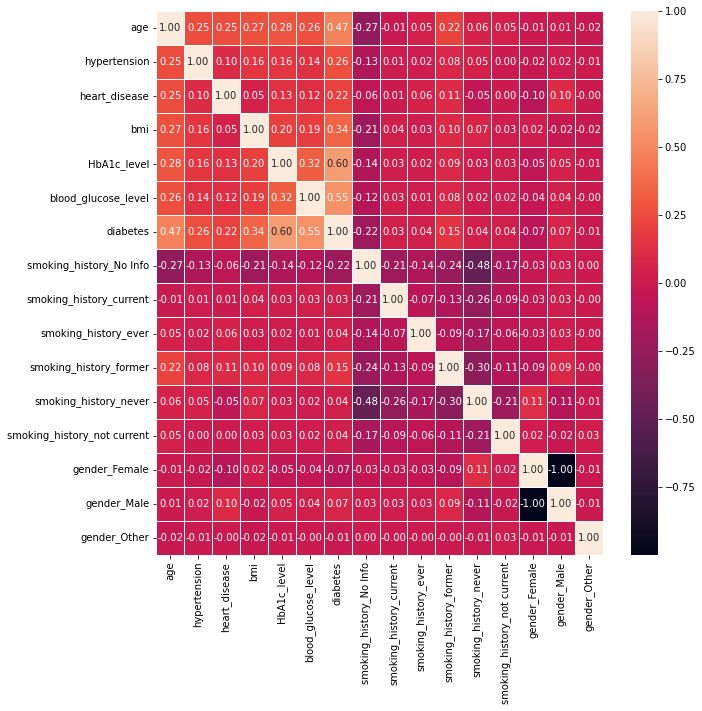

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering



In [28]:
# Split the data (with stratification to maintain class balance)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print(f" Completes set: {X.shape[0]} samples")
# print(f"\nTrain set: {X_train.shape[0]} samples")
# print(f"Test set: {X_test.shape[0]} samples")

from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA F-test works with continuous and categorical features
X_encoded = pd.get_dummies(df.drop('diabetes', axis=1))
y = df['diabetes']

# Split first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Use ANOVA F-test
f_selector = SelectKBest(f_classif, k=6)
X_train_selected = f_selector.fit_transform(X_train, y_train)
X_test_selected = f_selector.transform(X_test)

# Get selected features
selected_mask = f_selector.get_support()
selected_features = X_encoded.columns[selected_mask]
print("Features selected by ANOVA F-test:")
print(selected_features.tolist())

# Scores
feature_scores = pd.DataFrame({
    'feature': X_encoded.columns,
    'f_score': f_selector.scores_,
    'p_value': f_selector.pvalues_
}).sort_values('f_score', ascending=False)

print("\nFeature scores:")
print(feature_scores.head(10))


Features selected by ANOVA F-test:
['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No Info']

Feature scores:
                    feature      f_score        p_value
4               HbA1c_level  8434.426078   0.000000e+00
5       blood_glucose_level  6256.602508   0.000000e+00
0                       age  4317.054233   0.000000e+00
3                       bmi  1955.204502   0.000000e+00
1              hypertension  1071.066800  7.148902e-227
6   smoking_history_No Info   743.096750  1.085929e-159
2             heart_disease   726.201726  3.433479e-156
9    smoking_history_former   346.130634   2.189424e-76
13              gender_Male    92.029853   9.875835e-22
12            gender_Female    91.432098   1.333374e-21


Class distribution before SMOTE:
Training set: Counter({0: 8008, 1: 6792})
Test set: Counter({0: 2002, 1: 1699})

Class distribution after SMOTE:
Training set: Counter({1: 8008, 0: 8008})
Test set remains unchanged: Counter({0: 2002, 1: 1699})

Shapes before SMOTE: (14800, 6), (14800,)
Shapes after SMOTE: (16016, 6), (16016,)


Text(0, 0.5, 'Count')

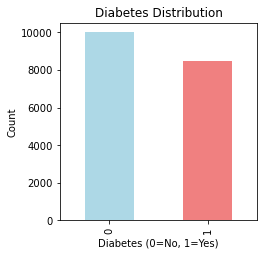

In [17]:
# Visualize class distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')

In [18]:
from sklearn.utils import resample
majority_class = df[df.diabetes == 0]
minority_class = df[df.diabetes == 1]


print("Majority class size:", len(majority_class))
print("Minority class size:", len(minority_class))

Majority class size: 10010
Minority class size: 8491



Class distribution after SMOTE:
Counter({0: 10010, 1: 10010})

New shapes:
X shape: (20020, 15)
y shape: (20020,)


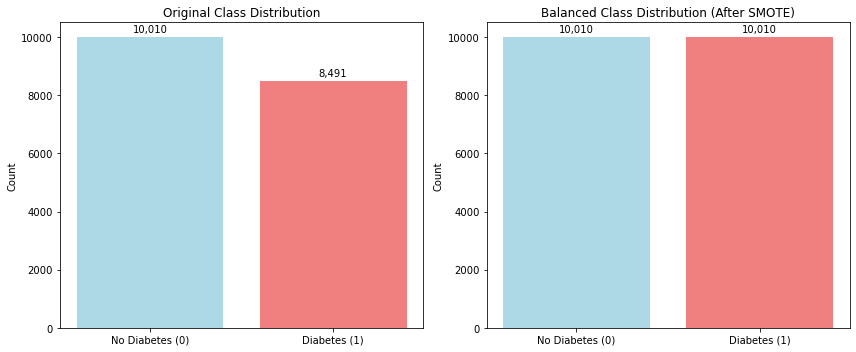

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Get features (X) and target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply SMOTE to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the new class distribution
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

# Update X and y with balanced data
X = X_resampled
y = y_resampled

print("\nNew shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)


# Visualize both original and balanced distributions
plt.figure(figsize=(12, 5))

# Original distribution plot
plt.subplot(1, 2, 1)
original_counts = [len(majority_class), len(minority_class)]
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], original_counts, color=['lightblue', 'lightcoral'])
plt.title('Original Class Distribution')
plt.ylabel('Count')
for i, count in enumerate(original_counts):
    plt.text(i, count + 100, f'{count:,}', ha='center', va='bottom')

# Balanced distribution plot
plt.subplot(1, 2, 2)
balanced_dist = Counter(y_resampled)
balanced_counts = [balanced_dist[0], balanced_dist[1]]
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], balanced_counts, color=['lightblue', 'lightcoral'])
plt.title('Balanced Class Distribution (After SMOTE)')
plt.ylabel('Count')
for i, count in enumerate(balanced_counts):
    plt.text(i, count + 100, f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()





 Completes set: 18501 samples

Train set: 14800 samples
Test set: 3701 samples


In [17]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model development and training

In [18]:
# Initializing models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf')
}

# Training individual models and store results
individual_models = {}
individual_predictions = {}
individual_probabilities = {}

print("Training individual models...")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Using scaled data for LR and SVM and  original data for RF
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        test_proba = model.predict_proba(X_test)[:, 1]
    
    # Store model and predictions
    individual_models[name] = model
    individual_predictions[name] = test_pred
    individual_probabilities[name] = test_proba
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, zero_division=0)
    test_recall = recall_score(y_test, test_pred, zero_division=0)
    test_f1 = f1_score(y_test, test_pred, zero_division=0)
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"Confusion Matrix:\n{cm}")

print("\nIndividual model training completed!")

Training individual models...

Training Random Forest...
Train Accuracy: 0.8961
Test Accuracy: 0.8900
Test Precision: 0.9324
Test Recall: 0.8199
Test F1-Score: 0.8725
Confusion Matrix:
[[1901  101]
 [ 306 1393]]

Training Logistic Regression...
Train Accuracy: 0.8840
Test Accuracy: 0.8827
Test Precision: 0.8785
Test Recall: 0.8640
Test F1-Score: 0.8712
Confusion Matrix:
[[1799  203]
 [ 231 1468]]

Training SVM...
Train Accuracy: 0.8916
Test Accuracy: 0.8873
Test Precision: 0.8793
Test Recall: 0.8746
Test F1-Score: 0.8770
Confusion Matrix:
[[1798  204]
 [ 213 1486]]

Individual model training completed!


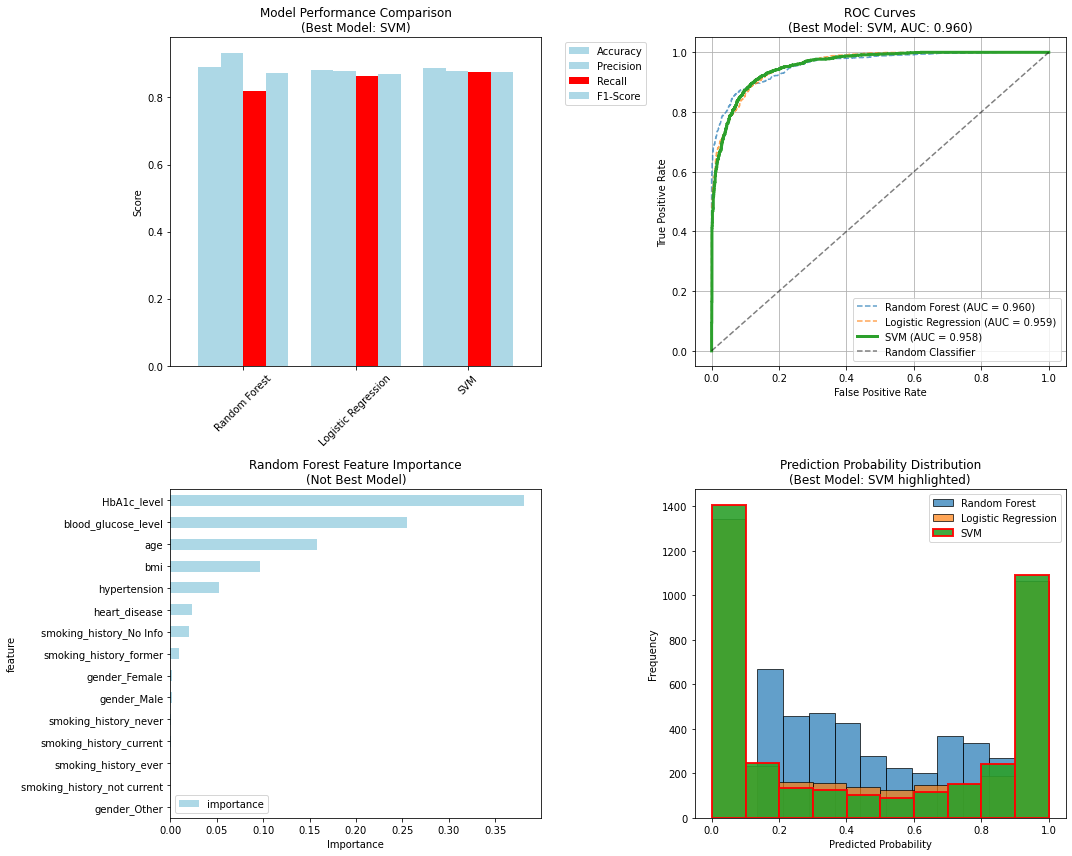


Model Performance Summary:
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.8900     0.9324  0.8199    0.8725
Logistic Regression    0.8827     0.8785  0.8640    0.8712
SVM                    0.8873     0.8793  0.8746    0.8770

Best Model: SVM
Average Score: 0.8796

Detailed Performance for Best Model (SVM):
----------------------------------------
Accuracy: 0.8873
Precision: 0.8793
Recall: 0.8746
F1-Score: 0.8770


In [19]:
    
# Create performance comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(individual_models.keys())
performance_data = []

# Find best model for each metric
best_models = {}
for name in model_names:
    if name in ['Logistic Regression', 'SVM']:
        test_pred = individual_models[name].predict(X_test_scaled)
    else:
        test_pred = individual_models[name].predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, zero_division=0)
    recall = recall_score(y_test, test_pred, zero_division=0)
    f1 = f1_score(y_test, test_pred, zero_division=0)
    performance_data.append([accuracy, precision, recall, f1])

performance_df = pd.DataFrame(performance_data, columns=metrics, index=model_names)

# Find best model (highest average score across all metrics)
performance_df['Average_Score'] = performance_df.mean(axis=1)
best_model_name = performance_df['Average_Score'].idxmax()
best_model_avg_score = performance_df.loc[best_model_name, 'Average_Score']
performance_df = performance_df.drop('Average_Score', axis=1)  # Remove average column for plotting

# Bar plot of performance metrics with best model highlighted
ax1 = axes[0, 0]
colors = ['lightblue' if name != best_model_name else 'red' for name in model_names]
performance_df.plot(kind='bar', ax=ax1, width=0.8, color=colors)
ax1.set_title(f'Model Performance Comparison\n(Best Model: {best_model_name})')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(model_names, rotation=45)

# 2. ROC Curves with best model highlighted
ax2 = axes[0, 1]
best_auc = 0
best_model_roc = None

for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, individual_probabilities[name])
    auc_score = roc_auc_score(y_test, individual_probabilities[name])
    
    # Track best AUC score
    if auc_score > best_auc:
        best_auc = auc_score
        best_model_roc = name
    
    linewidth = 3 if name == best_model_name else 1.5
    linestyle = '-' if name == best_model_name else '--'
    alpha = 1.0 if name == best_model_name else 0.7
    
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', 
             linewidth=linewidth, linestyle=linestyle, alpha=alpha)

ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title(f'ROC Curves\n(Best Model: {best_model_name}, AUC: {best_auc:.3f})')
ax2.legend()
ax2.grid(True)

# 3. Feature Importance (Random Forest)
ax3 = axes[1, 0]
rf_importance = individual_models['Random Forest'].feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance
}).sort_values('importance', ascending=True)

# Highlight if Random Forest is the best model
color = 'red' if 'Random Forest' == best_model_name else 'lightblue'
importance_df.plot(x='feature', y='importance', kind='barh', ax=ax3, color=color)
ax3.set_title(f'Random Forest Feature Importance\n({"Best Model" if "Random Forest" == best_model_name else "Not Best Model"})')
ax3.set_xlabel('Importance')

# 4. Prediction Probabilities Distribution with best model highlighted
ax4 = axes[1, 1]
for name in model_names:
    alpha = 0.7 if name != best_model_name else 0.9
    edgecolor = 'red' if name == best_model_name else 'black'
    linewidth = 2 if name == best_model_name else 1
    ax4.hist(individual_probabilities[name], alpha=alpha, label=name, bins=10, 
             edgecolor=edgecolor, linewidth=linewidth)

ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Frequency')
ax4.set_title(f'Prediction Probability Distribution\n(Best Model: {best_model_name} highlighted)')
ax4.legend()

plt.tight_layout()
plt.show()

# Print performance summary with best model highlighted
print("\nModel Performance Summary:")
print("=" * 50)
print(performance_df.round(4))

print(f"\nBest Model: {best_model_name}")
print(f"Average Score: {best_model_avg_score:.4f}")
print("=" * 50)

# Print detailed metrics for the best model
print(f"\nDetailed Performance for Best Model ({best_model_name}):")
print("-" * 40)
for metric in metrics:
    score = performance_df.loc[best_model_name, metric]
    print(f"{metric}: {score:.4f}")

In [20]:
# Create Voting Classifier ensemble
ensemble = VotingClassifier(
    estimators=[
        ('rf', individual_models['Random Forest']),
        ('lr', individual_models['Logistic Regression']),
        ('svm', individual_models['SVM'])
    ],
    voting='soft'  # Using probability predictions
)

# Fit the ensemble model
print("Training ensemble model...")
ensemble.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble.predict(X_test)
ensemble_proba = ensemble.predict_proba(X_test)[:, 1]

# Calculate metrics for ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_proba)

print("\nEnsemble Model Performance:")
print("="*50)
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-Score: {ensemble_f1:.4f}")
print(f"AUC-ROC: {ensemble_auc:.4f}")

# Compare with individual models
print("\nModel Comparison:")
print("="*50)
print("Model\t\t\tAccuracy\tF1-Score")
print("-"*50)
for name in individual_models.keys():
    acc = accuracy_score(y_test, individual_predictions[name])
    f1 = f1_score(y_test, individual_predictions[name])
    print(f"{name:<20} {acc:.4f}\t\t{f1:.4f}")
print(f"Ensemble\t\t{ensemble_accuracy:.4f}\t\t{ensemble_f1:.4f}")

Training ensemble model...

Ensemble Model Performance:
Accuracy: 0.8938
Precision: 0.8924
Recall: 0.8740
F1-Score: 0.8831
AUC-ROC: 0.9618

Model Comparison:
Model			Accuracy	F1-Score
--------------------------------------------------
Random Forest        0.8900		0.8725
Logistic Regression  0.8827		0.8712
SVM                  0.8873		0.8770
Ensemble		0.8938		0.8831


Model Comparison:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC  \
Random Forest          0.8900     0.9324  0.8199    0.8725   0.9601   
Logistic Regression    0.8827     0.8785  0.8640    0.8712   0.9593   
SVM                    0.8873     0.8793  0.8746    0.8770   0.9579   
Ensemble               0.8938     0.8924  0.8740    0.8831   0.9618   

                     Average Score  
Random Forest               0.8950  
Logistic Regression         0.8912  
SVM                         0.8952  
Ensemble                    0.9010  

Best Model for Each Metric:
----------------------------------------
Accuracy: Ensemble (0.8938)
Precision: Random Forest (0.9324)
Recall: SVM (0.8746)
F1-Score: Ensemble (0.8831)
AUC-ROC: Ensemble (0.9618)

Overall Best Model:
----------------------------------------
Model: Ensemble
Average Score: 0.9010


<Figure size 1152x576 with 0 Axes>

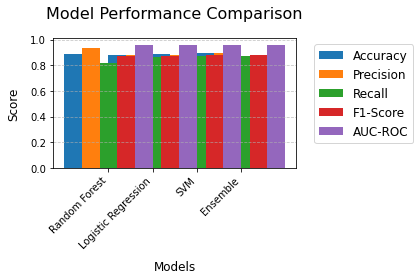

In [21]:
# Create a comparison DataFrame including the ensemble
comparison_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC-ROC': []
}

# Get metrics for all individual models
for name in individual_models.keys():
    if name in ['Logistic Regression', 'SVM']:
        pred = individual_models[name].predict(X_test_scaled)
        proba = individual_models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        pred = individual_models[name].predict(X_test)
        proba = individual_models[name].predict_proba(X_test)[:, 1]
    
    comparison_metrics['Accuracy'].append(accuracy_score(y_test, pred))
    comparison_metrics['Precision'].append(precision_score(y_test, pred))
    comparison_metrics['Recall'].append(recall_score(y_test, pred))
    comparison_metrics['F1-Score'].append(f1_score(y_test, pred))
    comparison_metrics['AUC-ROC'].append(roc_auc_score(y_test, proba))

# Add ensemble metrics
comparison_metrics['Accuracy'].append(ensemble_accuracy)
comparison_metrics['Precision'].append(ensemble_precision)
comparison_metrics['Recall'].append(ensemble_recall)
comparison_metrics['F1-Score'].append(ensemble_f1)
comparison_metrics['AUC-ROC'].append(ensemble_auc)

# Create DataFrame
model_names = list(individual_models.keys()) + ['Ensemble']
comparison_df = pd.DataFrame(comparison_metrics, index=model_names)

# Find the best model for each metric
best_model_metrics = comparison_df.idxmax()

# Calculate average performance across all metrics
comparison_df['Average Score'] = comparison_df.mean(axis=1)
overall_best_model = comparison_df['Average Score'].idxmax()

# Print results
print("Model Comparison:")
print("=" * 80)
print(comparison_df.round(4))
print("\nBest Model for Each Metric:")
print("-" * 40)
for metric, model in best_model_metrics.items():
    print(f"{metric}: {model} ({comparison_df.loc[model, metric]:.4f})")

print("\nOverall Best Model:")
print("-" * 40)
print(f"Model: {overall_best_model}")
print(f"Average Score: {comparison_df.loc[overall_best_model, 'Average Score']:.4f}")


plt.figure(figsize=(16,8))  
comparison_df.drop('Average Score', axis=1).plot(kind='bar', width=2)

# Enhanced visualization settings
plt.title('Model Performance Comparison', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=12, labelpad=10)
plt.ylabel('Score', fontsize=12, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [22]:
import pickle
best_model = ensemble
# Create a dictionary to hold the model and interpretability data
model = best_model

# Save to a pickle file
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model and interpretability techniques saved to 'ensemble_model.pkl'")

Model and interpretability techniques saved to 'ensemble_model.pkl'


In [ ]:
import pickle

sample_data = sample_data = pd.DataFrame([{
    'age': 44,
        'hypertension': 0,
        'heart_disease': 0,
        'bmi': 19.31,
        'HbA1c_level': 6.5,
        'blood_glucose_level': 200,
        'smoking_history_No Info': 0,
        'smoking_history_current': 0,
        'smoking_history_ever': 0,
        'smoking_history_former': 0,
        'smoking_history_never': 1,
        'smoking_history_not current': 0,
        'gender_Female': 1,
        'gender_Male': 0,
        'gender_Other': 0
}])


# Save to a pickle file
with open('ensemble_model.pkl', 'rb') as file:
    model = pickle.load(file)
prediction = model.predict(sample_data)
prediction

array([0])

In [24]:
if prediction[0] == 1:
    print("The person is predicted to have DIABETES (Positive)")
else:
    print("The person is predicted to NOT have DIABETES (Negative)")

The person is predicted to NOT have DIABETES (Negative)


In [25]:


import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
import shap
from sklearn.inspection import permutation_importance






1. FEATURE IMPORTANCE FROM ENSEMBLE COMPONENTS

Feature Importance Ranking:
--------------------------------------------------
HbA1c_level                   : 0.3778
blood_glucose_level           : 0.2438
age                           : 0.1521
bmi                           : 0.0971
hypertension                  : 0.0439
heart_disease                 : 0.0262
smoking_history_No Info       : 0.0220
smoking_history_former        : 0.0099
gender_Female                 : 0.0065
gender_Male                   : 0.0063
smoking_history_not current   : 0.0047
smoking_history_ever          : 0.0034
smoking_history_never         : 0.0025
smoking_history_current       : 0.0024
gender_Other                  : 0.0013


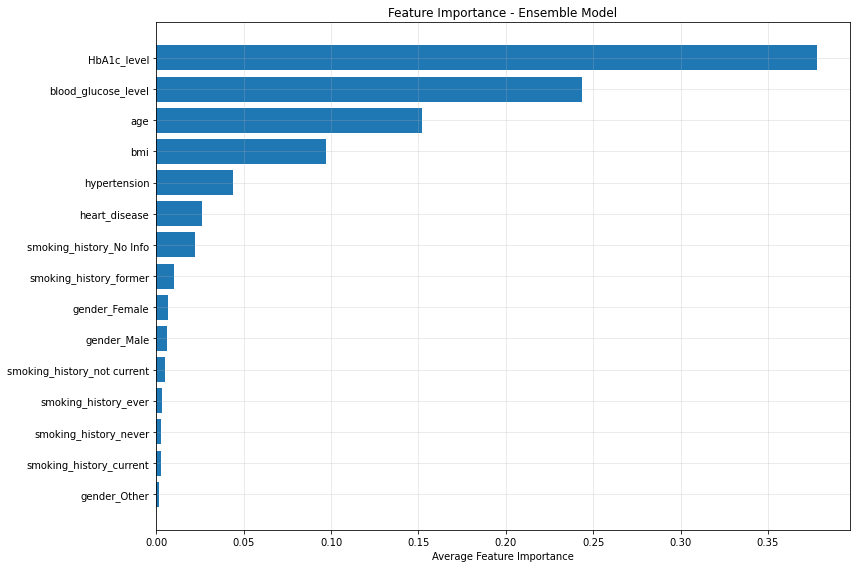

In [ ]:
# print("\n" + "="*60)
# print("1. GLOBAL FEATURE IMPORTANCE")
# print("="*60)

# # Built-in Feature Importance
# feature_importance = best_model.feature_importances_
# feature_names = sample_data.columns

# # Create a DataFrame for better visualization
# importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': feature_importance
# }).sort_values('importance', ascending=False)

# print("List of Features by Importance:")
# print("-" * 50)
# for i, row in importance_df.iterrows():
#     print(f"{row['feature']}: {row['importance']:.4f}")

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['feature'], importance_df['importance'])
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance - Random Forest')
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

print("\n" + "="*60)
print("1. FEATURE IMPORTANCE FROM ENSEMBLE ")
print("="*60)

# Get feature importance from Random Forest component
rf_model = individual_models['Random Forest']
feature_names = sample_data.columns

# Create importance DataFrame from Random Forest
importance_df = pd.DataFrame({
    'feature': feature_names,
    'Random Forest': rf_model.feature_importances_
})

# Get coefficients from Logistic Regression (need to scale them)
lr_model = individual_models['Logistic Regression']
lr_importance = np.abs(lr_model.coef_[0])
lr_importance = lr_importance / lr_importance.sum()  # Normalize
importance_df['Logistic Regression'] = lr_importance

# Calculate average importance
importance_df['Average Importance'] = importance_df[['Random Forest', 'Logistic Regression']].mean(axis=1)
importance_df = importance_df.sort_values('Average Importance', ascending=False)

# Print feature importance ranking
print("\nFeature Importance Ranking:")
print("-" * 50)
for idx, row in importance_df.iterrows():
    print(f"{row['feature']:<30}: {row['Average Importance']:.4f}")

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'], importance_df['Average Importance'])
plt.xlabel('Average Feature Importance')
plt.title('Feature Importance - Ensemble Model')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save importance information
feature_importance_dict = {
    'features': importance_df['feature'].tolist(),
    'importance': importance_df['Average Importance'].tolist()
}


3. LIME EXPLANATION
Intercept 0.4174627646353919
Prediction_local [0.36282266]
Right: 0.34645141666536
LIME Explanation:
--------------------------------------------------


<Figure size 720x432 with 0 Axes>

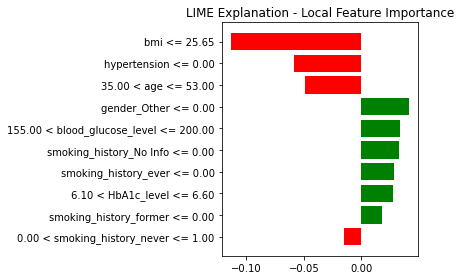


LIME Text Explanation:
------------------------------
bmi <= 25.65: -0.1138
hypertension <= 0.00: -0.0588
35.00 < age <= 53.00: -0.0491
gender_Other <= 0.00: 0.0412
155.00 < blood_glucose_level <= 200.00: 0.0339
smoking_history_No Info <= 0.00: 0.0331
smoking_history_ever <= 0.00: 0.0286
6.10 < HbA1c_level <= 6.60: 0.0276
smoking_history_former <= 0.00: 0.0181
0.00 < smoking_history_never <= 1.00: -0.0154


In [27]:

print("\n" + "="*60)
print("3. LIME EXPLANATION")
print("="*60)


# Create LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values if 'X_train' in locals() else sample_data.values,  # Use available data
    feature_names=feature_names,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification',
    verbose=True,
    random_state=42
)

# Explain the instance
exp = explainer_lime.explain_instance(
    sample_data.iloc[0].values, 
    best_model.predict_proba, 
    num_features=10
)

print("LIME Explanation:")
print("-" * 50)

# Show in console
exp.show_in_notebook(show_table=True)

# Plot explanation
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.title('LIME Explanation - Local Feature Importance')
plt.tight_layout()
plt.show()

# Print explanation in text format
print("\nLIME Text Explanation:")
print("-" * 30)
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")


2. SHAP EXPLANATION (KernelExplainer)


100%|██████████| 1/1 [01:14<00:00, 74.51s/it]


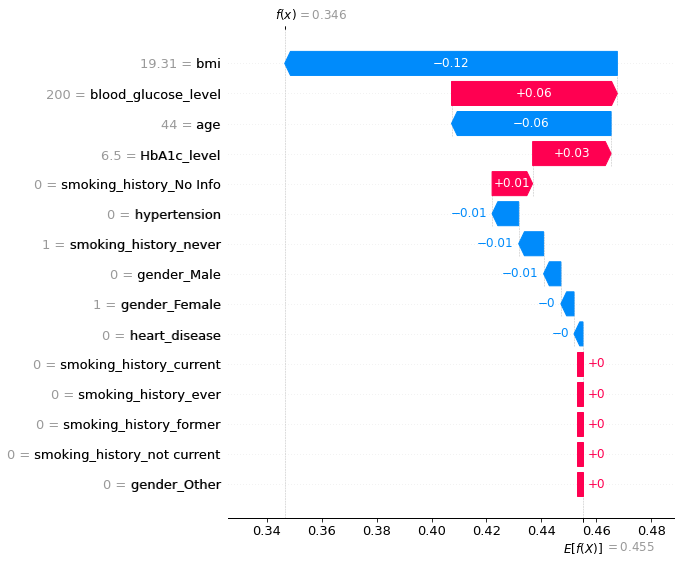

<Figure size 432x288 with 0 Axes>

In [28]:
# print("\n" + "="*60)
# print("2. SHAP EXPLANATION")
# print("="*60)

# # Create SHAP explainer
# explainer = shap.TreeExplainer(best_model)

# shap_values = explainer.shap_values(sample_data)
# shap_values_all = explainer(sample_data)
# shap.plots.waterfall(shap_values_all[0, :, 1], max_display=20)
# plt.show()

print("\n" + "="*60)
print("2. SHAP EXPLANATION (KernelExplainer)")
print("="*60)

def voting_predict_proba(X):
    return best_model.predict_proba(X)

# Create background data
background_data = shap.sample(X_train, 100)

# Create KernelExplainer
explainer = shap.KernelExplainer(voting_predict_proba, background_data)

# Get SHAP values as Explanation object
shap_explanation = explainer(sample_data)

# For binary classification
if len(shap_explanation.shape) == 3:  # Multi-class format
    shap.plots.waterfall(shap_explanation[0, :, 1], max_display=20)
else:  # Single output format
    shap.plots.waterfall(shap_explanation[0], max_display=20)

plt.tight_layout()
plt.show()